In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#1 Исследовать данные

df = pd.read_csv("/content/drive/MyDrive/day.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [49]:
#2 Создать тренировочную и тестовую подвыборки

X = df[['atemp']]
Y = df['temp']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)



In [50]:
#3 Построить модель линейной регрессии по своему набору данных (т.е. создать модель и обучить ее на тренировочной выборке)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

[17.58465987 10.46948463 32.36314614 15.28957987  7.46473695 29.03465292
 24.67251922 11.15792682 21.03896071 22.95107287 20.68362691  9.06360269
 23.69760109 25.93582223 26.39469279 28.05914393 13.25279636 25.21847338
 25.07512178 28.00160331 20.3115218  25.1324806  12.3633256  22.92266617
 28.48978958 24.75923921 28.11632095 18.84800833  5.32032611 21.97538208
 18.01530553 30.72769257 22.63537211 13.1084903  28.97802131 12.44950018
 10.31949722 27.25562049 30.55570701 23.52488832 34.68663285 13.48254979
 24.45208319 28.03019181 23.43871374 13.74030088  6.84724335 26.45246067
 12.16238792 22.20490826  8.92020564 21.60214069 12.14620747 19.22029525
 26.33751577 30.12433414 13.45337043 28.60473448  7.32606677 24.8455956
 10.32599668 14.22794175 25.85101117 16.06433299 15.17499858 25.87905427
 29.09219354 10.95735275 17.38531297 12.56403602 22.66473328 25.96422894
 12.70761487 36.98189465 15.11763976 11.55957491 31.53139781 13.56813352
 17.72837508 18.73360884 18.70406587 25.64875543 14.

In [52]:
#4 Получить коэффиценты уравнения линейной регрессии

print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1):  [0.90901458]
Свободный коэффицент уравнения w0: -1.2374413913788267


In [53]:
#5 Написать уравнение линейной регрессии

# -1.294358430703486 + 0.91130528*x

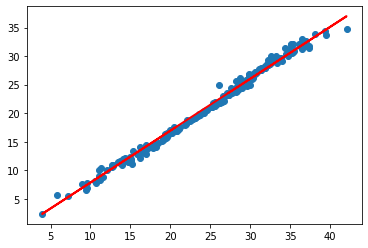

In [54]:
#6 Визуализировать данные и полученное уравнение линейной регрессии

plt.scatter(X_test['atemp'], y_test)
plt.plot(X_test['atemp'], y_pred, color='red', linewidth=2);
plt.show()

In [56]:
#7 Оценивать полученную модель с помощью MSE, MAE, R2.

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5130973861889783
Mean Squared Error: 0.41496237843806855
R2 score: 0.9926531191084497


In [ ]:
#8 Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), 
#  привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее 
#  значимыми, какие нет и почему.

print("Вывод")
print("R2 = 96% |=> программа отработала хорошо")
print("Но вот результаты MSE и MAE плачевные. Они приближены к 1, а должны быть ближе к 0")
print("Восстановленное линейное уравнение регрессии: -1.294358430703486 + 0.91130528*x")